## 컨볼루션 및 맥스풀링 구현 예제

### 컨볼루션(Convolution)

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

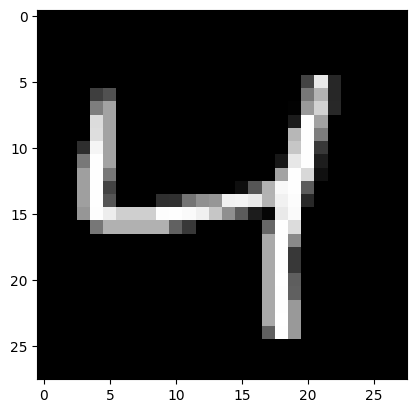

In [2]:
# mnist data download
(x_train, t_train), (x_test, t_test) = mnist.load_data()
plt.imshow(x_train[2], cmap='gray')

In [3]:
import numpy as np

horizontal_filter = np.array([[1., 1., 1.],
                             [0., 0., 0.],
                             [-1., -1., -1.]])
vertical_filter = np.array([[1., 0., -1.],
                           [1., 0., -1.],
                           [1., 0., -1.]])

In [4]:
test_image = x_train[2]
original_image_size = test_image.shape[0]
print("original_image_size = ", original_image_size)
conv_output_size = int((original_image_size - 3)/1 + 1)  # Feature Map 사이즈 측정
print("output size = ", conv_output_size)

original_image_size =  28
output size =  26


In [5]:
filter_size = 3

def get_conv_image(filter):
    
    filtered_image = np.zeros((conv_output_size, conv_output_size))
    
    for i in range(conv_output_size):
        for j in range(conv_output_size):
            # 합성곱 연산
            indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter  # 행렬 곱셈아니고 동일한 위치 데이터끼리 곱셈
            indice_sum = np.sum(indice_image)
            
            if(indice_sum > 255):  # 입력이 255이고 커널이 2이면 255보다 큰 값이 나올 수 있음
                indice_sum = 255
                
            filtered_image[i, j] = indice_sum
            
        return filtered_image

In [6]:
vertical_filtered_image = get_conv_image(vertical_filter)
horizontal_filtered_image = get_conv_image(horizontal_filter)

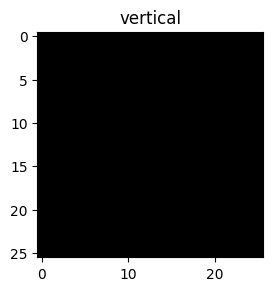

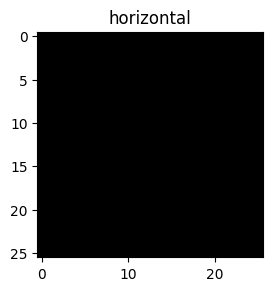

In [7]:
plt.subplot(1, 2, 1)
plt.title("vertical")
plt.imshow(vertical_filtered_image, cmap='gray')
plt.show()

plt.subplot(1, 2, 2)
plt.title("horizontal")
plt.imshow(horizontal_filtered_image, cmap='gray')
plt.show()

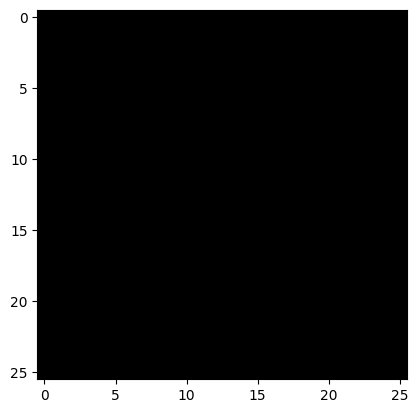

In [8]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image))
plt.imshow(sobel_image, cmap='gray')
plt.show()